<div style="text-align: center;">
  <h1>Laptop Price Prediction</h1>
  <h2>Author: Korosaki</h2>
  <h3>Date: Feb 2025</h3>
</div>

# DataFrame

In [1]:
import yaml
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
import os

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

path = config['paths']['data']
fig_path = config['paths']['figures']
print(path)
print(fig_path)

D:/Workspace/Machine_Learning/Supervised_Learning/Regression/Laptop_Price_Prediction/data
D:/Workspace/Machine_Learning/Supervised_Learning/Regression/Laptop_Price_Prediction/figure


In [3]:
raw_path = os.path.join(path, 'raw_data/laptop_prices.csv')

df = pd.read_csv(raw_path)
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [4]:
df.shape

(11768, 11)

In [5]:
dfSummary(df, show_graph=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Brand[object],1. Apple2. HP3. MSI4. Microsoft5. Dell6. Asus7. Acer8. Samsung9. Lenovo10. Razer,"1,262 (10.7%)1,208 (10.3%)1,190 (10.1%)1,175 (10.0%)1,170 (9.9%)1,165 (9.9%)1,165 (9.9%)1,163 (9.9%)1,145 (9.7%)1,125 (9.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADUklEQVR4nO3cMWobQQCG0VEQJm4khMGH8SFy2BxCtxHGW8TGjVKkTtBqxBeQ3+uzqPgYs8v82ZzP5wGFb//7B/B1iI2M2MiIjYzYyIiNjNjIiI2M2MhsxhiPY4yHyed8ns/n9xv8Hu7Y9unp6cdutzvMPGRZltfNZvNTcPzLdrfbHV5eXt73+/3HNQ94e3v7fjweD6fT6WGMITb+ajvGGPv9/uP5+fnXxHMeb/R7uGNeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mhsx/hzTejaB8z8W76W7bIsr8fj8TAmrgkty/I6xvi83c/iHrkWTmbjfzGicouTzanGRaYHL8YuXGpq8GLswhq3GLwYu3ARH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjITA1ejF1YY3rwYuzCpVwLJ2PwQsbJRsbghYzBCxmDFzI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRsEMhYV5GZPdmcalxsal1lWcUaV6+rLKtYa3ZdZVnFxXzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3P14MXYhbWmBi/GLqzhWjgZgxcyTjYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMq6FkzF4IeMFgYw/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyroWTsa4i42QjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNaOBmDFzJeEMj4M0rGuoqMdRUZ6yoyXhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i41o4GesqMk42MgYvZAxeyBi8kPFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuhZMxeCHjZCNj8ELG4IWMwQsZH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyNghkrKvIeEEgIzYyYiMjNjJiIyM2MmIj8xuoyxlzxGjnnwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Processor[object],1. Intel i32. Intel i73. AMD Ryzen 34. AMD Ryzen 95. Intel i96. Intel i57. AMD Ryzen 58. AMD Ryzen 7,"1,570 (13.3%)1,509 (12.8%)1,500 (12.7%)1,472 (12.5%)1,456 (12.4%)1,429 (12.1%)1,422 (12.1%)1,410 (12.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC0ElEQVR4nO3cMWobQQCG0VEQJm4khECH8SFy2BxCtxHCW8TGjVIEQgpLbsZfiPLeAQYXHyt2md+ry+UyoPDlb/8B/D/ERkZsZMRGRmxkxEZmNcZ4HGM8TD737XK5vEw+k3/cer/ff9tsNruZhy7Lcl6tVt8Fx5/Wm81m9/T09LLdbl9nHPj8/Pz1eDzuTqfTwxhDbPy2HmOM7Xb7ejgcfkw893HiWdwJLwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk1mP8uhY068CZZ3Ff1suynI/H425MvBa0LMt5jPE26zzug2vhZFb+/QKVz3iyearxrumDF2MXrpk6eDF24ZbPGLwYu/AuH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjITB28GLtwy/TBi7EL17gWTsbghYwXBDJ+RslYV5GxriJjXUXGCwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkXAsnY11FZvaTzVONq6YOXoxduGXa4MXYhY/MHrwYu3CVj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkpg1ejF34yNTBi7ELt7gWTsbghYwXBDJ+RslYV5GxriJjXUXGCwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkXAsnY11FxpONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryNggkLGuIuPJRsa6iox1FRnrKjI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9kPNnIGLyQMXghY/BCxkddMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjA0CGesqMl4QyIiNjNjIiI2M2Mj8BP54roRRUGaXAAAAAElFTkSuQmCC"">",0(0.0%)
3,RAM (GB)[int64],Mean (sd) : 24.9 (21.8)min < med < max:4.0 < 16.0 < 64.0IQR (CV) : 24.0 (1.1),5 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABn0lEQVR4nO3cQYriUBSG0fsKEZ0kiOBiXEQtthbhbqSJg66iQdOzmjS0GhHzU+eMk2uQjxd0cNs4jgVz9/bqB4BbLK5d0FpbV9Vy4vw/4zh+TrwXvv031Nbaervdvnddt5ky/HQ6/WqtfYiVR107UZdd1232+/1n3/df9wwehmF1OBw2x+NxWVVC5SFXX/1VVX3ff+12u98T5q8n3AP/8GOKCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQi3LQk7SeyF3ZeZh3qq2KxF3Z+Zhvqi2OxF3aCZx4ssw21ZhCLvbC3e/bBMudQq0osQZ56sMw+VLI862Dx9xQRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhFu2uY3DMPq3sHDMKzO5/OiqrrW2t0PVlXd5XJZ/MDPTvXQd3btmr/6U597NAsxkgAAAABJRU5ErkJ

# Data Visualization

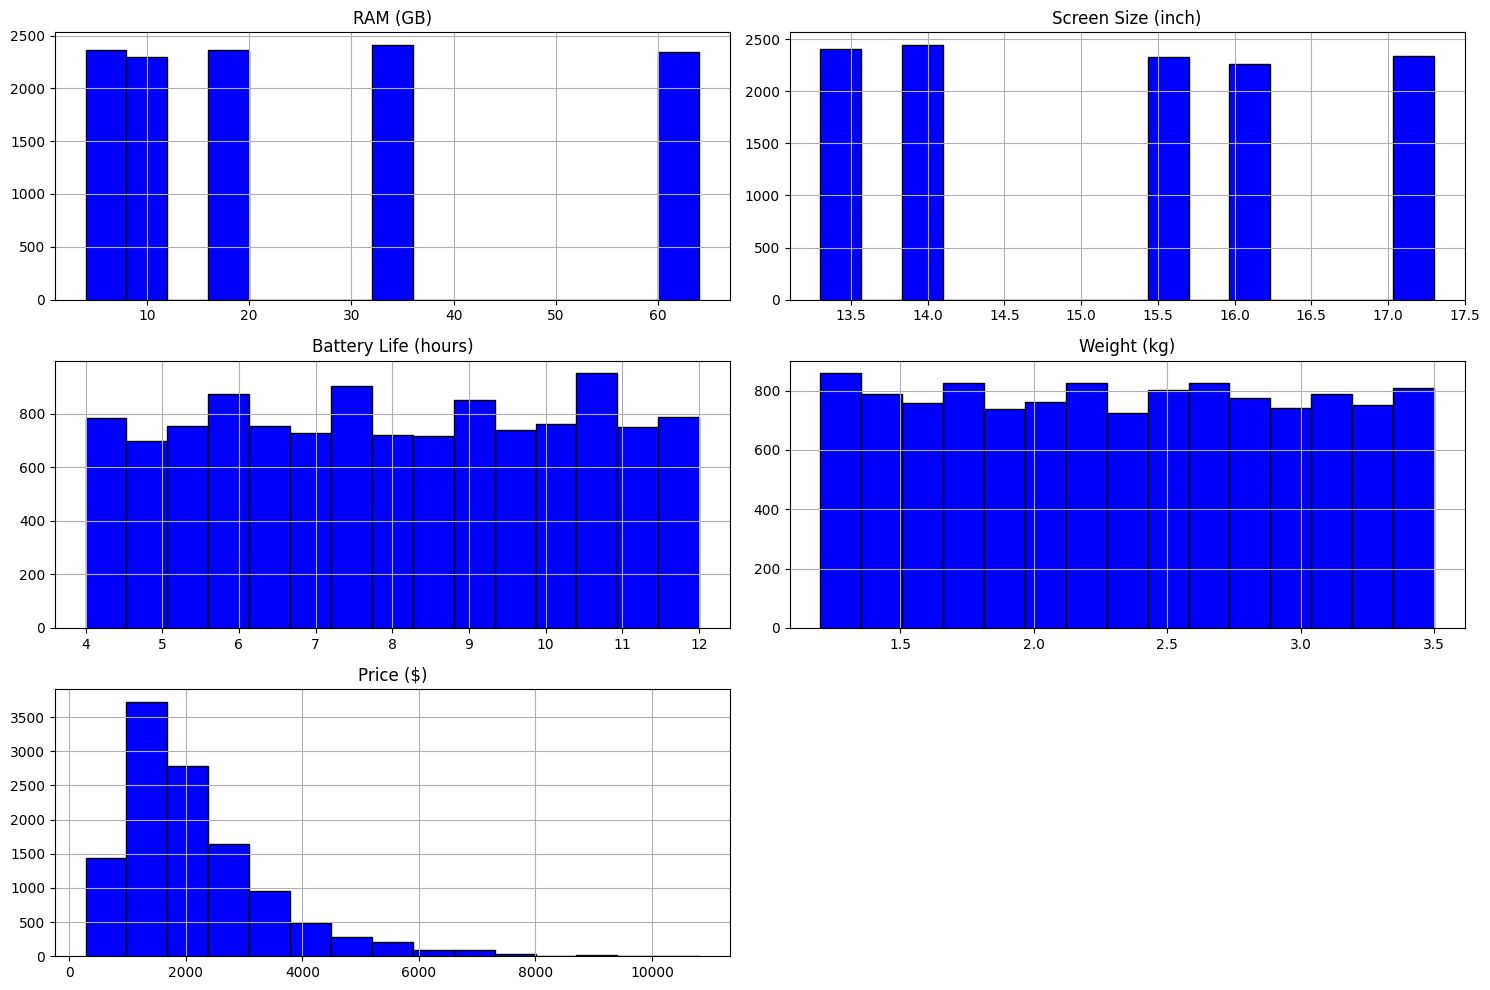

In [6]:
df.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.savefig(os.path.join(fig_path, 'data_distribution.png'))
plt.show()

In [7]:
num_feat = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_feat

['RAM (GB)',
 'Screen Size (inch)',
 'Battery Life (hours)',
 'Weight (kg)',
 'Price ($)']

In [8]:
corr_matrix = df[num_feat].corr()
corr_matrix

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
RAM (GB),1.000000,0.007915,0.012470,-0.001716,0.616221
Screen Size (inch),0.007915,1.000000,0.008348,-0.015508,0.069829
Battery Life (hours),0.012470,0.008348,1.000000,-0.001774,0.009778
Weight (kg),-0.001716,-0.015508,-0.001774,1.000000,0.002431
Price ($),0.616221,0.069829,0.009778,0.002431,1.000000


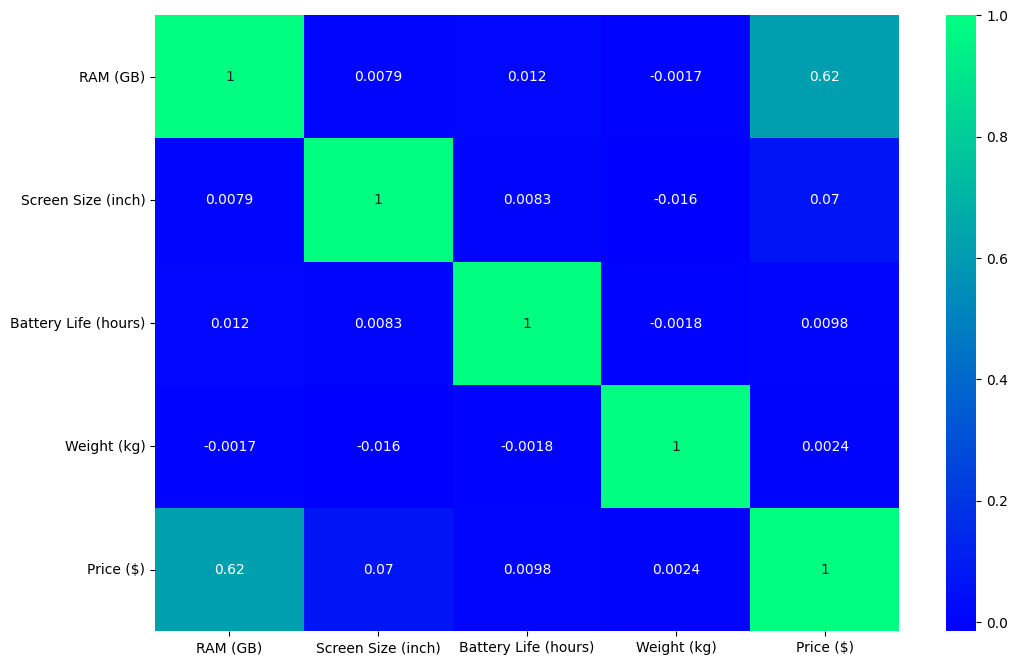

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_feat].corr(), annot=True, cmap='winter')
plt.savefig(os.path.join(fig_path, 'correlation.png'))
plt.show()

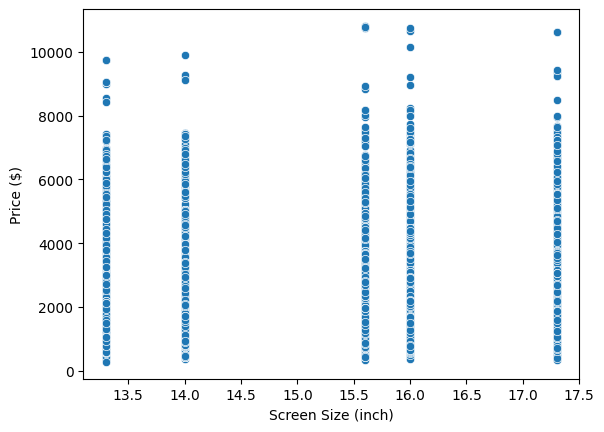

In [14]:
sns.scatterplot (data=df, y='Price ($)', x='Screen Size (inch)')
plt.show()